# **Phân tích rời bỏ của khách hàng**


###Thêm các thư viện cần thiết

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Thêm dữ liệu vào

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/DEAN/Churn_Modelling.csv'

df = pd.read_csv(data_path)

Mounted at /content/drive


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


###Xem thông tin dữ liệu

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None


###Tiền xử lý

####Xóa bỏ dữ liệu trùng lặp

In [ ]:
df = df.drop_duplicates()
print(f"Số lượng bản ghi sau khi loại bỏ trùng lặp: {df.shape[0]}")

Số lượng bản ghi sau khi loại bỏ trùng lặp: 10000


####Chuyển dữ liệu cột Age về dạng làm tròn số

In [ ]:
df['Age'] = df['Age'].round(0)
print (df['Age'])

0        42.0
1        41.0
2        42.0
3        39.0
4        43.0
         ... 
9995     39.0
9996     35.0
9997     36.0
9998     42.0
10000    28.0
Name: Age, Length: 10000, dtype: float64


####Xử lý dữ liệu null

In [ ]:
# HasCrCard, sử dụng mode để thay vào giá trị bị thiếu
mode_value = df['HasCrCard'].mode()[0]
df['HasCrCard'].fillna(mode_value, inplace=True)
# Geography, sử dụng mode
mode_value = df['Geography'].mode()[0]
df['Geography'].fillna(mode_value, inplace=True)
# IsActiveMember, sử dụng mode
mode_value = df['IsActiveMember'].mode()[0]
df['IsActiveMember'].fillna(mode_value, inplace=True)
# Age, sử dụng mode
mode_value = df['Age'].mode()[0]
df['Age'].fillna(mode_value, inplace=True)

####Xóa các cột dữ liệu không cần thiết

In [ ]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


####Mã hóa biến

In [ ]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Spain' : 1, 'Germany' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,1,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,1,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,1,1,43.0,2,125510.82,1,1.0,1.0,79084.10,0


####Kiểm tra và loại bỏ Outlier

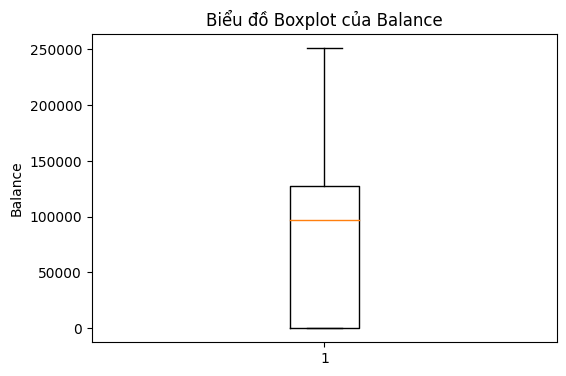

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Balance'])
plt.title('Biểu đồ Boxplot của Balance')
plt.ylabel('Balance')
plt.show()

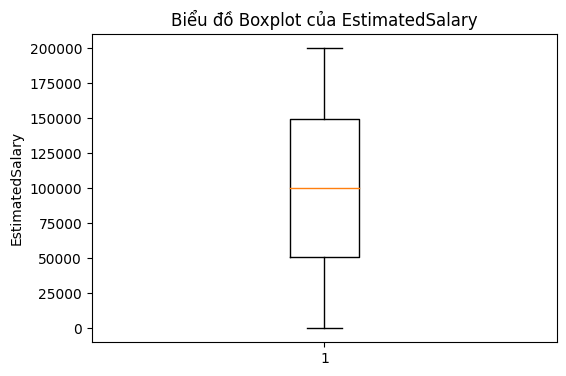

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['EstimatedSalary'])
plt.title('Biểu đồ Boxplot của EstimatedSalary')
plt.ylabel('EstimatedSalary')
plt.show()

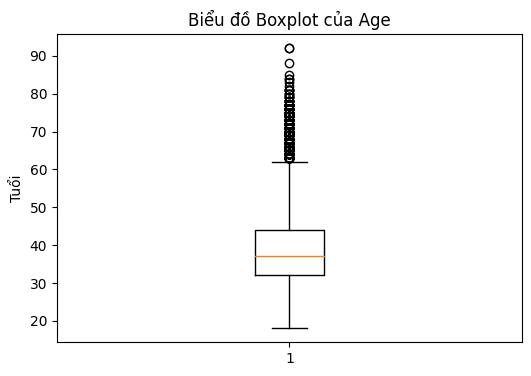

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Age'])
plt.title('Biểu đồ Boxplot của Age')
plt.ylabel('Tuổi')
plt.show()

In [ ]:
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df_cleaned = df[abs(z_scores) < threshold]
    return df_cleaned

# Loại bỏ outlier của cột 'Age' từ DataFrame 'df'
df_cleaned = remove_outliers_zscore(df, 'Age')
print("\nDữ liệu sau khi loại bỏ outlier:")
df_cleaned.head()


Dữ liệu sau khi loại bỏ outlier:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,1,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,1,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,1,1,43.0,2,125510.82,1,1.0,1.0,79084.10,0


###Biểu đồ Heatmap

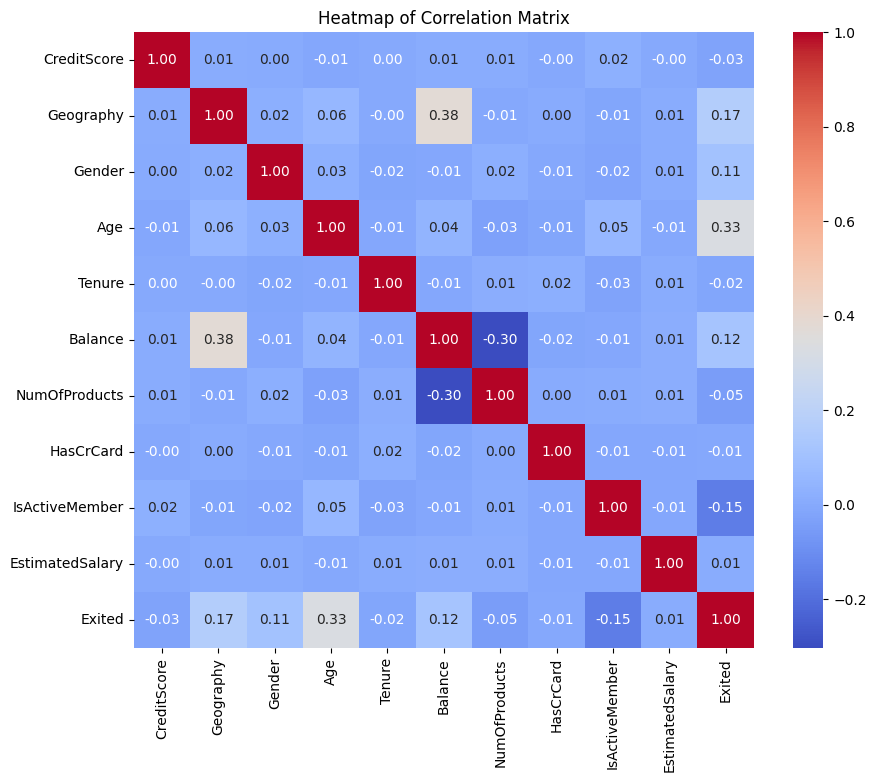

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = df_cleaned.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

###Xây dựng mô hình

####Mô hình LogisticRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chia dữ liệu thành features (X) và target variable (y)
X = df_cleaned[['Gender', 'Geography', 'Age', 'Balance','IsActiveMember']]
y = df_cleaned['Exited']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu nếu tất cả các cột trong X_train và X_test là số
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [ ]:
# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8297872340425532

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1575
           1       0.71      0.27      0.39       399

    accuracy                           0.83      1974
   macro avg       0.78      0.62      0.64      1974
weighted avg       0.81      0.83      0.80      1974


Confusion Matrix:
 [[1532   43]
 [ 293  106]]


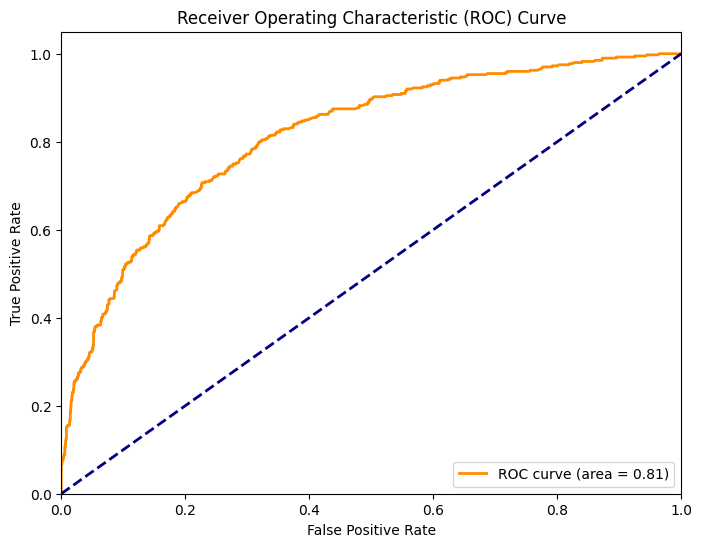

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Đặc điểm của khách hàng mới
new_customer = [[1, 2, 55, 5000, 0]]

# Chuẩn hóa dữ liệu mới bằng cùng bộ scaler đã sử dụng cho tập huấn luyện
new_customer_scaled = scaler.transform(new_customer)

# Dự đoán sử dụng mô hình
prediction = model.predict(new_customer_scaled)

if prediction == 0:
    print("Khách hàng này dự đoán không rời đi.")
else:
    print("Khách hàng này dự đoán sẽ rời đi.")


Khách hàng này dự đoán sẽ rời đi.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Tạo mẫu mới bằng phương pháp Random Undersampling
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Huấn luyện mô hình Logistic Regression trên dữ liệu đã resampled
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7472137791286727

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83      1575
           1       0.43      0.73      0.54       399

    accuracy                           0.75      1974
   macro avg       0.67      0.74      0.68      1974
weighted avg       0.82      0.75      0.77      1974


Confusion Matrix:
 [[1185  390]
 [ 109  290]]


####Mô hình Neural Networks

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Chia dữ liệu thành features (X) và target variable (y)
X = df_cleaned.drop(['Exited'], axis=1)
y = df_cleaned['Exited']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mô hình ANN bằng TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

Epoch 1/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8228
Epoch 2/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8468
Epoch 3/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8537
Epoch 4/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8542
Epoch 5/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8578
Epoch 6/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8565
Epoch 7/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8591
Epoch 8/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8594
Epoch 9/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8615
Epoch 10/20
247/247 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8632

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Dự đoán giá trị trên tập kiểm tra
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# In ra confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# In ra classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Đánh giá lại accuracy (tỷ lệ chính xác đã in trước đó bằng model.evaluate)
accuracy = np.mean(y_test == y_pred.flatten())
print("Accuracy:", accuracy)


62/62 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1500   75]
 [ 183  216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1575
           1       0.74      0.54      0.63       399

    accuracy                           0.87      1974
   macro avg       0.82      0.75      0.77      1974
weighted avg       0.86      0.87      0.86      1974

Accuracy: 0.8693009118541033


Training Accuracy: 0.8781198263168335
Training Loss: 0.2912149727344513
Test Accuracy: 0.8682877421379089
Test Loss: 0.3185109496116638
Model is not overfitting.


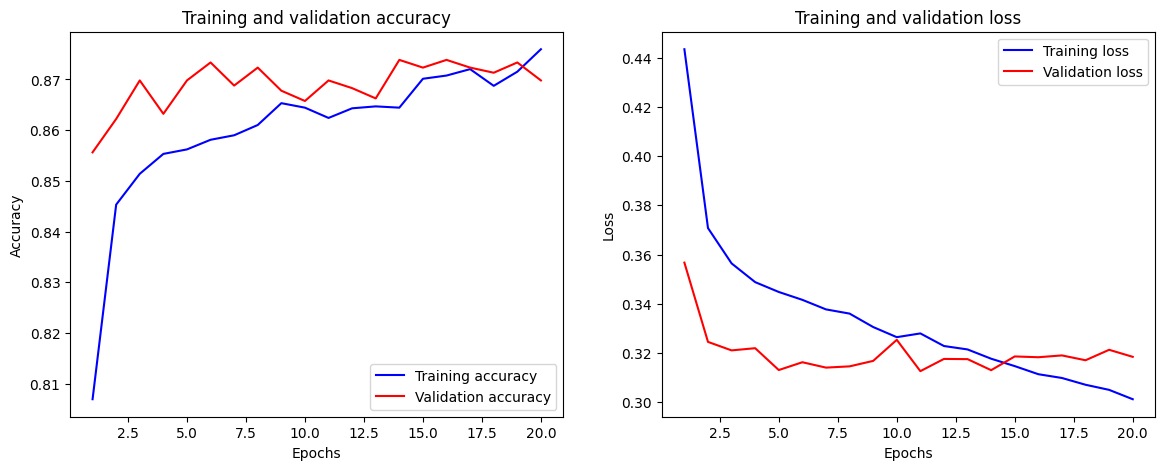

In [ ]:

# Đánh giá hiệu suất của mô hình trên tập huấn luyện và tập kiểm tra
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", accuracy_train)
print("Training Loss:", loss_train)

loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy_test)
print("Test Loss:", loss_test)

# Kiểm tra sự khác biệt giữa tập huấn luyện và tập kiểm tra
if accuracy_train - accuracy_test > 0.05:
    print("Model may be overfitting.")
else:
    print("Model is not overfitting.")

# Vẽ biểu đồ loss và accuracy
def plot_training_history(history):
    # Lấy dữ liệu từ lịch sử huấn luyện
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Vẽ biểu đồ accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Vẽ biểu đồ loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_training_history(history)
